# Exercise 10: Support Vector Regression

##  H10.2: Regression with the $\nu$-SVR

In [1]:
# general setup

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import NuSVR
from sklearn.model_selection import KFold

In [2]:
# load data

Training_set = np.genfromtxt('TrainingRidge.csv', delimiter=',', skip_header=1)
Validation_set = np.genfromtxt('ValidationRidge.csv', delimiter=',', skip_header=1)

X_train, X_val = Training_set[:,[0,1]], Validation_set[:,[0,1]]
T_train, T_val =  Training_set[:,2], Validation_set[:,2]


In [3]:
# help method to show predictions (dimensions are known)

def showData(Dat, title, M = np.array([]), cm = 'viridis'):
    
    fig, ax = plt.subplots(figsize=(8,8))
    
    im = ax.imshow(Dat.reshape(41,36), extent=[139.5, 210.5, 39.5, 120.5], aspect= 7.0/8.0, origin='lower', cmap=plt.get_cmap(cm))
    
    if (M.shape[0] > 0 and M.shape[1] == 2):
        m = ax.scatter(M[:,0], M[:,1], marker = 's', color='r', s = 10, label = 'data points')
        ax.legend(handles=[m])
            
    ax.set_title(title)
    fig.colorbar(im, ax=ax)
    plt.show()


### (a)

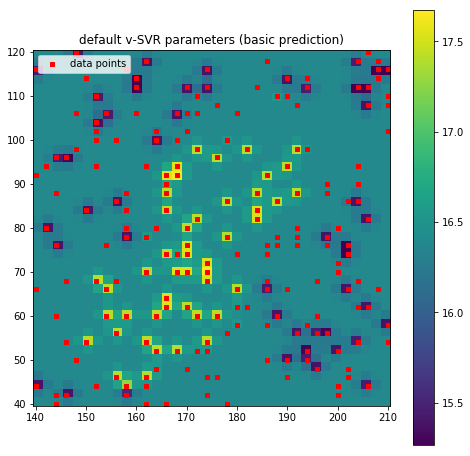

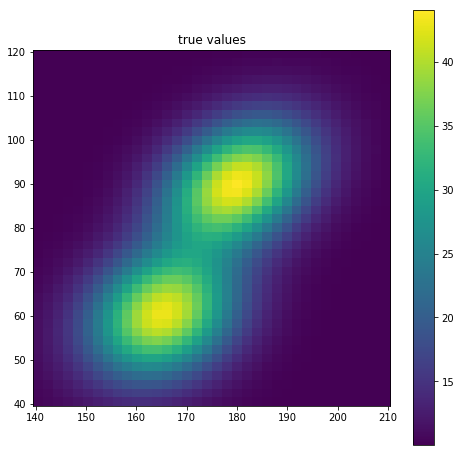

basic MSE = 76.7912781084


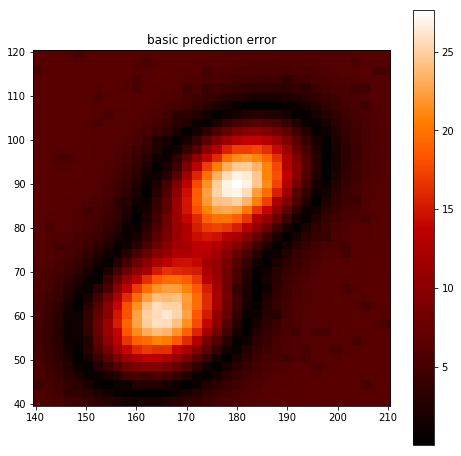

minimum Error:  0.019315595882
maximum Error:  27.6111075457


In [4]:
clf = NuSVR()
clf.fit(X_train, T_train)

basic_prediction = clf.predict(X_val)

showData(basic_prediction, 'default v-SVR parameters (basic prediction)', X_train)
showData(T_val, 'true values')

MSE = np.average(np.square(basic_prediction - T_val))
print ("basic MSE =",MSE)

Err_basic = np.absolute(T_val - basic_prediction)
showData(Err_basic, 'basic prediction error', cm = 'gist_heat')
print ("minimum Error: ", np.min(Err_basic))
print ("maximum Error: ", np.max(Err_basic))

### (b)

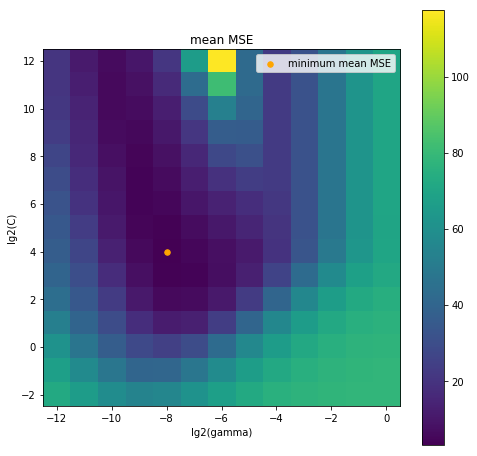

minimum mean MSE:  3.19240952247  for C = 16.0 and gamma = 0.00390625


In [5]:
kfold = KFold(10)

nu = 0.5

i_list = np.arange(-2.0,13.0,1.0)
n = i_list.size
C = np.power(np.full(n,2), i_list)

j_list = np.arange(-12.0,1.0,1.0)
m = j_list.size
gamma = np.power(np.full(m,2), j_list)

MSE_matrix = np.zeros((n,m,10))

k = -1
for train, test in kfold.split(X_train):
    k+=1
    for i in range(n):
        for j in range(m):
            
            clf = NuSVR(nu = nu, C = C[i], kernel = 'rbf', gamma = gamma[j])
            clf.fit(X_train[train], T_train[train])

            MSE_matrix[i,j,k] = np.mean(np.square(clf.predict(X_val) - T_val))
            
MSE_matrix = np.mean(MSE_matrix, axis = 2)

fig, ax = plt.subplots(figsize=(8,8))

C_min, C_max, gamma_min, gamma_max = np.min(i_list) - 0.5, np.max(i_list) + 0.5 , np.min(j_list) - 0.5, np.max(j_list) + 0.5
extent=[gamma_min, gamma_max, C_min, C_max]
aspect = (gamma_max-gamma_min)/(C_max-C_min)

im = ax.imshow(MSE_matrix, extent = extent, aspect = aspect, origin='lower')
ax.set_title("mean MSE")

min_mse_ind = np.unravel_index(np.argmin(MSE_matrix), (n,m))
x_min = j_list[min_mse_ind[1]]
y_min = i_list[min_mse_ind[0]]

min_mean = plt.scatter(x_min, y_min, color = 'orange', s = 30, label='minimum mean MSE')
plt.legend(handles=[min_mean])

plt.xlabel("lg2(gamma)")
plt.ylabel("lg2(C)")
fig.colorbar(im, ax=ax)

plt.show()

min_gamma, min_C = gamma[min_mse_ind[1]], C[min_mse_ind[0]]

print ("minimum mean MSE: ", np.min(MSE_matrix)," for C =", min_C, "and gamma =", min_gamma)


### (c)

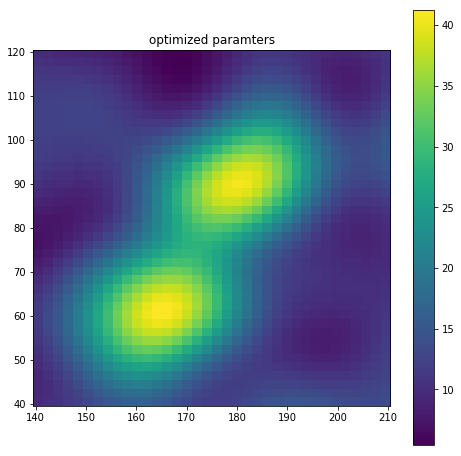

optimized MSE = 2.72390215561


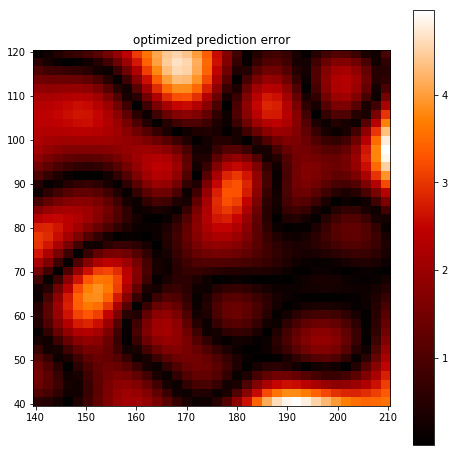

minimum Error:  0.0013339631736
maximum Error:  4.96236198241


In [6]:
clf = NuSVR(nu = nu, C = min_C, kernel = 'rbf', gamma = min_gamma)
clf.fit(X_train, T_train)

optimized_prediction = clf.predict(X_val)

showData(optimized_prediction, 'optimized paramters')

optimized_MSE = np.average(np.square(optimized_prediction - T_val))
print ("optimized MSE =", optimized_MSE)

Err_optimized = np.absolute(T_val - optimized_prediction)
showData(Err_optimized, 'optimized prediction error', cm = 'gist_heat')
print ("minimum Error: ", np.min(Err_optimized))
print ("maximum Error: ", np.max(Err_optimized))

The optimized model delivers greatly improved results with a drastically lower MSE. The maximum error for the optimized model is even lower than the average error for the model with default paramters. Also, the error values are more 'spread out' and do not (visibly) correlate with regions of high label values as before.